### Data Understanding

Since we are working with data that is related to medical measurements, we want to plot graphs as they are a way to tell us a story about the data.

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import VotingClassifier


In [2]:
cd = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
cd.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

### Data Preparation & Visualization

Three things to notice are the id, age, gender column. Id can be converted into the index column. Age is given in days so we want to convert that to years. As for gender, it's probably best/easist to convert this to 2=male and 1=female

It would be good to get a visual presentation of the some of the features that we will use to build our model. Creating plots is a great way to tell a story.

In [5]:
cd['age'] = cd['age'].map(lambda x: x // 365)

In [6]:
cd.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50       2     168    62.0    110     80            1     1      0   
1   1   55       1     156    85.0    140     90            3     1      0   
2   2   51       1     165    64.0    130     70            3     1      0   
3   3   48       2     169    82.0    150    100            1     1      0   
4   4   47       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [7]:
cd['gender'] = cd['gender'].replace({2: "male", 1: "female"})

In [8]:
cd.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50    male     168    62.0    110     80            1     1      0   
1   1   55  female     156    85.0    140     90            3     1      0   
2   2   51  female     165    64.0    130     70            3     1      0   
3   3   48    male     169    82.0    150    100            1     1      0   
4   4   47  female     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

In [9]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 6.9+ MB


In [10]:
cd = cd.set_index('id')

In [11]:
cd.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                              
0    50    male     168    62.0    110     80            1     1      0     0   
1    55  female     156    85.0    140     90            3     1      0     0   
2    51  female     165    64.0    130     70            3     1      0     0   
3    48    male     169    82.0    150    100            1     1      0     0   
4    47  female     156    56.0    100     60            1     1      0     0   

    active  cardio  
id                  
0        1       0  
1        1       1  
2        0       1  
3        1       1  
4        0       0

In [12]:
fig = px.box(cd, y='height', points='all', color='gender', title="Height distribution between Male and Female")
fig.show()
fig.write_image("height_distr.png")

In [13]:
fig = px.box(cd, y='age', points='all', color='gender', title="Age distribution between Male and Female")
fig.show()
fig.write_image("age_distr.png")

In [14]:
fig = px.box(cd, y='weight', points='all', color='gender', title="Weight distribution between Male and Female")
fig.show()
fig.write_image("weight_distr.png")

In [15]:
fig = px.box(cd, y='ap_hi', points='all', color='gender', title="Systolic blood pressure between Male and Female")
fig.show()
fig.write_image("systolic_bp_distr.png")

In [16]:
fig = px.box(cd, y='ap_lo', points='all', color='gender', title="Diastolic blood pressure between Male and Female")
fig.show()
fig.write_image("diastolic_bp_distr.png")

In [17]:
cd.groupby(by=['gender'])[['cholesterol']].value_counts()

gender  cholesterol
female  1              33570
        2               6403
        3               5557
male    1              18815
        2               3146
        3               2509
Name: count, dtype: int64

In [18]:
cd.groupby(by=['gender'])['gluc'].value_counts()

gender  gluc
female  1       38471
        3        3643
        2        3416
male    1       21008
        2        1774
        3        1688
Name: count, dtype: int64

In [19]:
cd.groupby(by=['gender'])['smoke'].value_counts()

gender  smoke
female  0        44717
        1          813
male    0        19114
        1         5356
Name: count, dtype: int64

In [20]:
cd.groupby(by=['gender'])['smoke'].value_counts()

gender  smoke
female  0        44717
        1          813
male    0        19114
        1         5356
Name: count, dtype: int64

In [21]:
cd.groupby(by=['gender'])['active'].value_counts()

gender  active
female  1         36516
        0          9014
male    1         19745
        0          4725
Name: count, dtype: int64

In [22]:
X = cd.drop(['cardio'], axis = 1)
y = cd['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['gender']), 
                                     remainder = StandardScaler())

### Functions

In [26]:
def grid_search_cv(model, feature, target, parameters):
    grid = GridSearchCV(estimator=model, param_grid=parameters).fit(feature, target)
    return grid

In [32]:
def conf_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test), labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

In [28]:
def print_scores(model_name, model, feature, target):
    print(f'{model_name} results')
    print(f'Training data score: {model.best_score_}')
    print(f'Test data score: {model.score(feature, target)}')
    print(f'Best parameters: {model.best_params_}')
    print(f'Time for fitting best model: {model.refit_time_}')

### Modeling

Since our target value is a categorical, it is best model to test mutltiple classification models to see which one fits our dataset the best. I will use four classification models, `KNeighborsClassifier`, `LogisticRegression`, `DecisionTreeClassifier`,`SVC` (Support Vector Machines), and Ensemble techniques. There are many different models and algorithms out there, and there isn't one model that "fits all". It's always best to not only test out a few models, but also their hyperparameters as well by utilizing `GridSearchCV` (which I will be doing).

### KNeighborsClassifier

In [29]:
knn_pipe = Pipeline([('transform', transformer),
                     ('knn', KNeighborsClassifier())]) 

In [30]:
kn_params = {'knn__n_neighbors': list(range(1,11))}

In [31]:
knn_grid = grid_search_cv(knn_pipe, X_train, y_train, kn_params)

In [33]:
print_scores('KNeighborsClassifier', knn_grid, X_test, y_test)

KNeighborsClassifier results
Training data score: 0.658495238095238
Test data score: 0.6606285714285715
Best parameters: {'knn__n_neighbors': 9}
Time for fitting best model: 0.05555081367492676


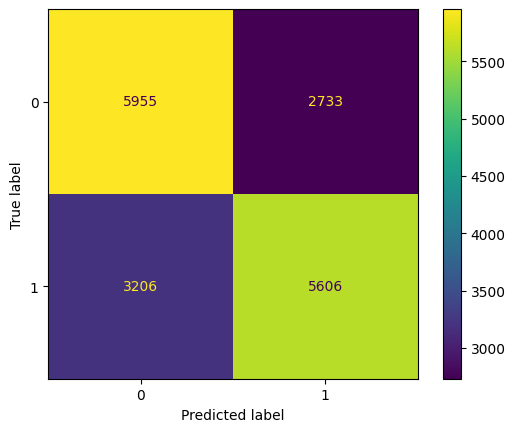

In [34]:
conf_matrix(knn_grid)

### LogisticRegression

In [35]:
lr_pipe = Pipeline([('transform', transformer),
                     ('lr', LogisticRegression())])

In [36]:
lr_params = {'lr__max_iter': list(range(1,11))}

In [ ]:
lr_grid = grid_search_cv(lr_pipe, X_train, y_train, lr_params)

In [38]:
print_scores('LogisticRegression', lr_grid, X_test, y_test)

LogisticRegression results
Training data score: 0.7142666666666667
Test data score: 0.7160571428571428
Best parameters: {'lr__max_iter': 10}
Time for fitting best model: 0.052407026290893555


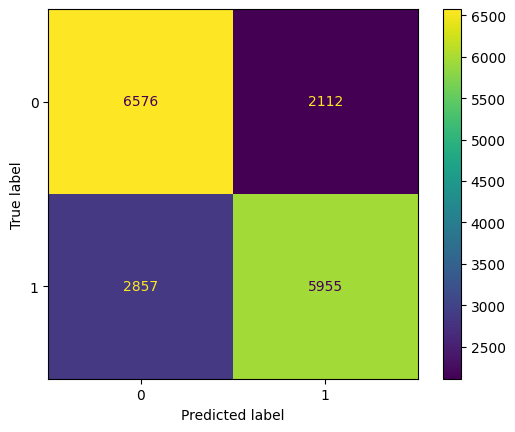

In [39]:
conf_matrix(lr_grid)

### DecisionTreeClassifier

In [40]:
dtr_pipe = Pipeline([('transform', transformer),
                     ('dtr', DecisionTreeClassifier())])

In [41]:
dtr_params = {'dtr__criterion': ['gini', 'entropy', 'log_loss']}

In [42]:
dtr_grid = grid_search_cv(dtr_pipe, X_train, y_train, dtr_params)

In [43]:
print_scores('DecisionTreeClassifier', dtr_grid, X_test, y_test)

DecisionTreeClassifier results
Training data score: 0.6401142857142857
Test data score: 0.6408
Best parameters: {'dtr__criterion': 'entropy'}
Time for fitting best model: 0.16663408279418945


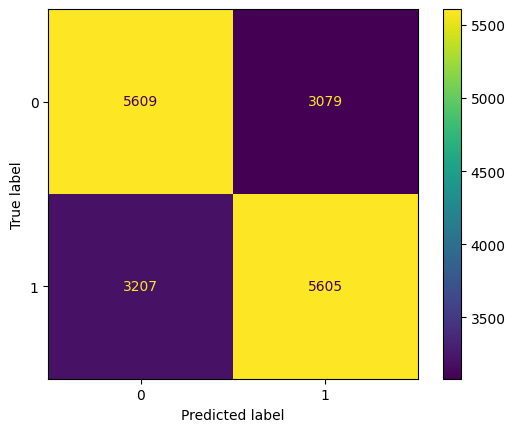

In [44]:
conf_matrix(dtr_grid)

### Support Vector Machines

I was unable to use GridSearchCV and pass a params_grid due to the limitations of my home computer. I have tried passing in two hyperparameters `kernel` and `gamma`, which led to the python kernel to run for more than an hour. 

In [45]:
svc_pipe = Pipeline([('transform', transformer),
                     ('svc', SVC())])

In [46]:
svc_pipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['gender'])])),
                ('svc', SVC())])

In [47]:
print('SupportVectorMachines results')
print(f'Training data score: {svc_pipe.score(X_train, y_train)}')
print(f'Test data score: {svc_pipe.score(X_test, y_test)}')

SupportVectorMachines results
Training data score: 0.7324380952380952
Test data score: 0.7293714285714286


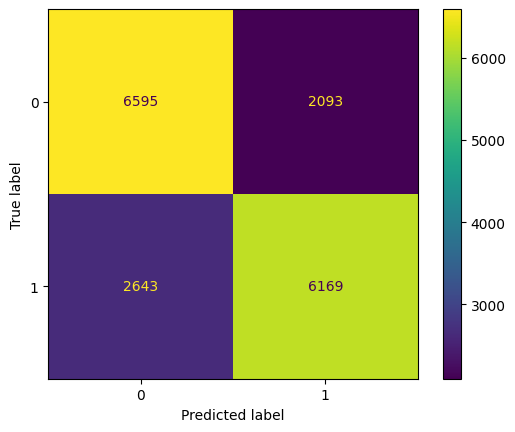

In [48]:
conf_matrix(svc_pipe)

### VotingClassifier

In [25]:
ensemble_pipe = Pipeline([('transform', transformer),
                     ('ens', VotingClassifier([('svc', SVC(probability = True)), ('lgr', LogisticRegression()), ('knn', KNeighborsClassifier())], voting = 'soft'))])

ensemble_pipe.fit(X, y)
soft_score = ensemble_pipe.score(X, y)

print("Ensemble results")
print(f"Sore: {soft_score}")

Ensemble results
Sore: 0.7588571428571429


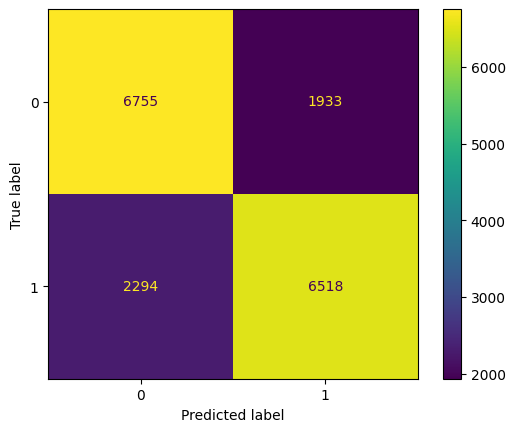

In [49]:
conf_matrix(ensemble_pipe)